## Example of extracting the lever arm and the charging energy from bias triangles and addition lines

Authors: Anne-Marije Zwerver and Pieter Eendebak

The core functions used in the example are `perpLineIntersect`, `lever_arm` and `E_charging`. Input needed for the code are the charge stability diagrams of an anti-crossing with bias triangles.

In [5]:
%matplotlib inline
import os, sys
import qcodes
import qtt
import matplotlib.pyplot as plt
import numpy as np

from qcodes import MatPlot
from qtt.data import diffDataset
from qtt.algorithms.bias_triangles import perpLineIntersect, lever_arm, E_charging

### Load datasets

In [7]:
exampledatadir=os.path.join(qtt.__path__[0],'..', 'docs', 'notebooks','data')
qcodes.DataSet.default_io = qcodes.DiskIO(exampledatadir)
dataset_anticrossing = qcodes.load_data(os.path.join(exampledatadir, r'Lever_arm_Charging_energy', '14-28-52_qtt_scan2Dfast'))
dataset_la = qcodes.load_data(os.path.join(exampledatadir, r'Lever_arm_Charging_energy', '14-33-26_qtt_scan2Dfast'))
dataset_Ec = qcodes.load_data(os.path.join(exampledatadir, r'Lever_arm_Charging_energy', '10-06-59_qtt_scan2Dfast'))

First, make a double dot and find the (1,0) -- (0,1) anticrossing:

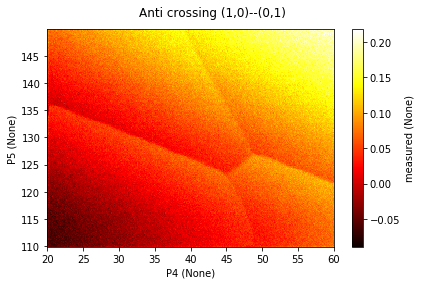

In [8]:
plt.figure(1); plt.clf()
MatPlot([dataset_anticrossing.measured], num = 1)
_=plt.suptitle('Anti crossing (1,0)--(0,1)') 

Then, apply a bias over the Fermi reservoirs (in the example -800 uV) and scan the anti crossing again. Due to the difference in Fermi levels in the reservoirs, bias triangles will arise. The vertical and horizontal 'height' of the bias triangles changes with applied bias and thus the lever arm can be extracted from these triangles. We plot the bias triangles (to extract the lever arm).

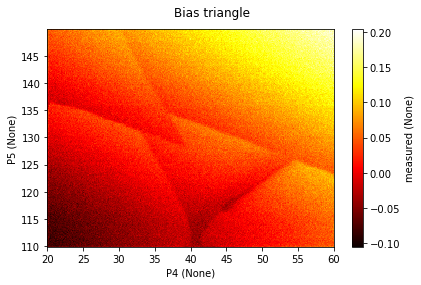

In [9]:
plt.figure(1); plt.clf()
MatPlot([dataset_la.measured], num = 1)
_=plt.suptitle('Bias triangle') 

### Lever arm

To extract the lever arm, first the length from a point of the bias triangle to the addition line has to be determined. In order to do this, use the function 'perpLineIntersect' and add as description 'lever_arm'. The function will then tell you where to click the three points.

Click the three points on the figure. Point 1 and 2 along the addition line for the dot of which you want to determine the lever arm, the third point on the triple point where both dot levels are aligned. The perpLineIntersect function will return a dictionary containing the coordinates of these three points, the intersection point of a horizontal/vertical line of the third point with the (extended) line through point 1 and 2 and the line length from the third point to the intersection.

If you want to determine the lever arm for dot 4, take the horizontal line (vertical = False), if you want to determine the lever arm for dot 5, take the vertical line (vertical = True).

NB: The function used to extract the lever arm and the charging energy (perpLineIntersect), makes use of interactive plots in which addition lines have to be clicked. However, Jupyter notebook does not allow interactive plots inline. Therefore, a slightly different function is used here, that already takes the clicked points as an input. If you want to try and click, restart the notebook and please use '%pylab tk' instead of '%matplotlib inline' and the function 'perpLineIntersect' instead of the function 'perpLineIntersect_ipynb'.

Please click three points;
            Point 1: on the addition line for the dot represented on the vertical axis
            Point 2: further on the addition line for the dot represented on the vertical axis
            Point 3: on the triple point at the addition line for the dot represented on the horizontal axis
            where both dot levels are aligned


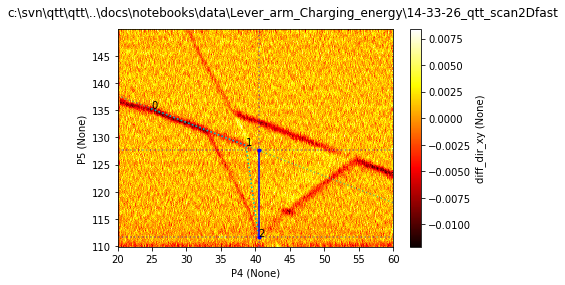

In [10]:
dot = 'P5'

if dot == 'P4':
    vertical = False
elif dot == 'P5':
    vertical = True
else:
    print("Please choose either dot 4 or dot 5")

clicked_pts = np.array([[  24.87913077,   38.63388728,   40.44875099],
       [ 135.28934654,  128.50469446,  111.75508464]])

lev_arm_fit = perpLineIntersect(dataset_la, description = 'lever_arm', vertical = vertical, points = clicked_pts)

Determine the lever arm ($\mu$V/mV) by dividing the applied bias for the bias triangles by the voltage span determined by la_fit

In [17]:
bias = dataset_la.snapshot()['allgatevalues']['O5']
lev_arm = lever_arm(bias, lev_arm_fit, fig = True)
print('''The lever arm of dot %s is %.2f ueV/mV'''%(dot, lev_arm))

The lever arm of dot P5 is 50.46 ueV/mV


### Extract addition energy

Plot the addition lines (to extraxt the charging energy). Again, use the function perpLineIntersect, this time to obtain the charging energy (in mV). When you give 'E_charging' as argument for 'description', the function will tell you where to click the points. By means of the lever arm, the chagring energy can be expressed in meV.

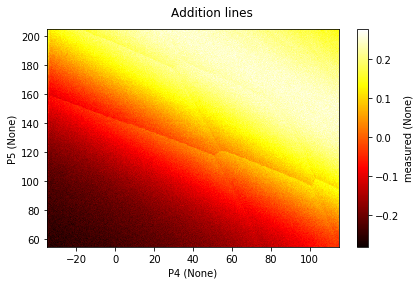

In [13]:
plt.figure(3); plt.clf()
MatPlot([dataset_Ec.measured], num = 3)
ax = plt.gca()
_=plt.suptitle('Addition lines') 

Please click three points;
            Point 1: on the (0, 1) - (0,2) addition line
            Point 2: further on the (0, 1) - (0,2) addition line
            Point 3: on the (0, 0) - (0, 1) addition line 


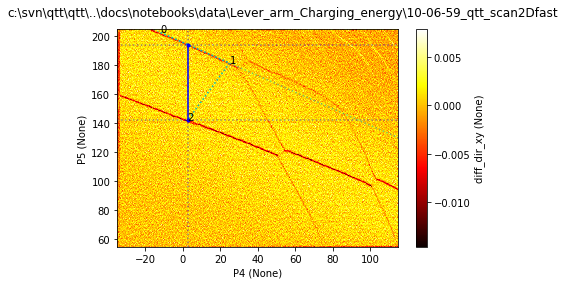

In [14]:
clicked_pts = np.array([[ -11.96239499,   24.89272409,    2.56702695],
        [ 202.62140281,  181.56972616,  142.246783  ]])

Ec_fit = perpLineIntersect(dataset_Ec, description = 'E_charging', vertical = vertical, points = clicked_pts)

In [15]:
E_c = E_charging(lev_arm, results = Ec_fit, fig = True)
print('The charging energy for dot %s is %.2f meV' % (dot, E_c/1000))

The charging energy for dot P5 is 2.63 meV
